# Similar cities to Barueri in Sorocaba region
#### Rodrigo Medeiros

## Introduction

A retired couple which lives in Barueri desire to move to Sorocaba region to be close to their family, they don't know very well the region and have concerns about the city they are going to choose. They intend to move to a city similar to Barueri in terms of social development, demographic density, availability of restaurants, parks, museums and so on.

To verify the cities in Sorocaba region that are similar to Barueri in this aspects, will be used technics of web scrapping data and machine learning to identify and propose cities with best odds to satisfy the couple.

## Data Description

To find out the most similar cities to Barueri in Sorocaba region will be used the following data:

 - The Barueri geographical information will be retrieve from Barueri page on Wikipédia (https://pt.wikipedia.org/wiki/Barueri), in this page is possible to found information about the total area of the city in Km^2, total population and Human Development Index;
 
 
 - A table with geographical informtaion from the cities in Sorocaba region will be retrieve from Metropolitan Region of Sorocaba page on Wikipédia (https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Sorocaba), in this table as available the same information retrieved from Barueri in its page;

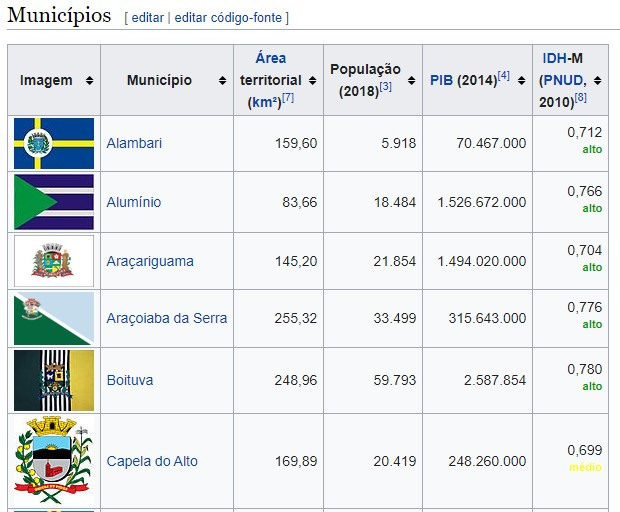

<center> Table from Metropolitan Sorocaba Region wikipédia page </center>

 - The Foursquare API will be used to retrieve the venues for each city, this API returns a json file containing all the information of the venues in a certain radius of a given location. In this project will be considered the venues in a radius of 7Km from the city coordinate, the information that will be retrieve from this file will be the category of the venues and its quantity per city;

## Metodology

In [186]:
# importing the necessary packages
# package to manage the request
import urllib.request
import requests as rq

# packages to manage the data
import pandas as pd
import numpy as np

# packages to manage the json files
import json
from pandas.io.json import json_normalize

# packages to manage the plots
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# package to scale the data
from sklearn.preprocessing import StandardScaler

# package to cluster the data
from sklearn.cluster import KMeans

# package to parse the webpages
from bs4 import BeautifulSoup

# package to get the coordinates
import geocoder

The first step is retrieve the Barueri information from its page on Wikipédia

In [101]:
# define a variable to store the url
url_bar = 'https://pt.wikipedia.org/wiki/Barueri'

# store the page into another variable
page_bar = urllib.request.urlopen(url_bar)

# create a BeutifulSoup object
soup_bar = BeautifulSoup(page_bar, 'lxml')

In [102]:
# find the table with information needed
table_bar = soup_bar.find('table', class_='infobox_v2')

# extract the table text into lists
A = []
B = []

for row in table_bar.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 2:
        A.append(cells[0].get_text())
        B.append(cells[1].get_text())

# creating a dataframe from the lists
df_bar = pd.DataFrame(A, dtype='str', columns=['Caracteristics'])
df_bar['Values'] = B

df_bar

,Caracteristics,Values
0,Bandeira,Brasão de armas
1,Lema\n,Flor vermelha que encanta\n
2,Apelido(s)\n,"""Flor vermelha que encanta""\n"
3,Gentílico\n,barueriense[1]\n
4,Coordenadas\n,"23° 30' 38"" S 46° 54' 34"" O\n"
5,País\n,Brasil\n
6,Unidade federativa\n,São Paulo\n
7,Região intermediária[2]\n,São Paulo\n
8,Região imediata[2]\n,São Paulo\n
9,Região metropolitana\n,São Paulo\n


In [125]:
# creating a dataframe with useful information from Barueri
data_bar = {'City':['Barueri'], 
            'Area':[df_bar['Values'][16][:6]],
            'Population':[df_bar['Values'][17][:3] + df_bar['Values'][17][4:7]],
            'HDI':[df_bar['Values'][22][:5]]
           }

df_dbar = pd.DataFrame(data=data_bar)
df_dbar

,City,Area,Population,HDI
0,Barueri,"65,701",274182,"0,786"


In [126]:
# define a variable to store the url
url_sr = 'https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Sorocaba'

# store the page into another variable
page_sr = urllib.request.urlopen(url_sr)

# create a BeutifulSoup object
soup_sr = BeautifulSoup(page_sr, 'lxml')

In [218]:
# find the table with information needed
table_sr = soup_sr.find('table', class_='wikitable sortable')


# extract the table text into lists
A = []
B = []
C = []
D = []

for row in table_sr.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 6:
        A.append(cells[1].get_text()[:-1]) 
        B.append(cells[2].get_text()[:-1])
        C.append(cells[3].get_text()[:-1])
        if len(cells[5].get_text()) == 10: # conditional clause used to slice the data and get only the numbers
            D.append(cells[5].get_text()[:-5])
        else:
            D.append(cells[5].get_text()[:-6])

# creating a dataframe from the lists
df_sr = pd.DataFrame(A, columns=['City'])
df_sr['Area'] = B
df_sr['Population'] = C
df_sr['HDI'] = D

df_sr

,City,Area,Population,HDI
0,Alambari,"159,60",5.918,"0,712"
1,Alumínio,"83,66",18.484,"0,766"
2,Araçariguama,"145,20",21.854,"0,704"
3,Araçoiaba da Serra,"255,32",33.499,"0,776"
4,Boituva,"248,96",59.793,"0,780"
5,Capela do Alto,"169,89",20.419,"0,699"
6,Cerquilho,"127,80",48.074,"0,782"
7,Cesário Lange,"190,39",17.915,"0,706"
8,Ibiúna,"1.058,08",78.262,"0,710"
9,Iperó,"170,28",36.280,"0,719"


In [234]:
# Create a new dataframe including Barueri information
df_cities = df_sr.append(df_dbar)
df_cities = df_cities.sort_values(['City'], ascending=True)
df_cities.reset_index(drop=True, inplace=True)

# converting Area column to float type
df_cities['Area'] = [x.replace(".", "") for x in df_cities['Area']]
df_cities['Area'] = [x.replace(",", ".") for x in df_cities['Area']]
df_cities['Area'] = df_cities['Area'].astype('float')

# converting Area column to int type
df_cities['Population'] = [x.replace(".", "") for x in df_cities['Population']]
df_cities['Population'] = df_cities['Population'].astype('int')

# converting Area column to float type
df_cities['HDI'] = [x.replace(",", ".") for x in df_cities['HDI']]
df_cities['HDI'] = df_cities['HDI'].astype('float')



df_cities.dtypes

City           object
Area          float64
Population      int64
HDI           float64
dtype: object

In [235]:
# creating the lists to store the coordinates
latitude=[]
longitude=[]

# the loop to interact with all rows in data frame
for city in df_cities['City']:
    
    # variable to control the while loop
    lat_long_coord = None
    
    # while loop to guarantie that the result is not none, needs because this package is unreliable
    while (lat_long_coord is None):
        #print('send request')
        g = geocoder.arcgis('{}, São Paulo, BRA'.format(city))
        lat_long_coord = g.latlng
    
    # storing the latitudes and longitudes 
    latitude.append(lat_long_coord[0])
    longitude.append(lat_long_coord[1])

In [236]:
# including the latitude and longitude information on dataframe
df_cities['Latitude'] = latitude
df_cities['Longitude'] = longitude

df_cities

,City,Area,Population,HDI,Latitude,Longitude
0,Alambari,159.600,5918,0.712,-23.55100,-47.90006
1,Alumínio,83.660,18484,0.766,-23.52186,-47.25471
2,Araçariguama,145.200,21854,0.704,-23.43502,-47.06784
3,Araçoiaba da Serra,255.320,33499,0.776,-23.50521,-47.61543
4,Barueri,65.701,274182,0.786,-23.50430,-46.84463
5,Boituva,248.960,59793,0.780,-23.28396,-47.67219
6,Capela do Alto,169.890,20419,0.699,-23.46930,-47.73352
7,Cerquilho,127.800,48074,0.782,-23.16760,-47.74733
8,Cesário Lange,190.390,17915,0.706,-23.22465,-47.95570
9,Ibiúna,1058.080,78262,0.710,-23.65717,-47.22366


In [229]:
# generating the map with the cities
map_region = folium.Map(location=[-23.472925, -47.190285], zoom_start=9.47)

for lat, lon, poi in zip(df_cities['Latitude'], df_cities['Longitude'], df_cities['City']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_region)

map_region

Defining the credentials to Foursquare API

In [171]:
# The code was removed by Watson Studio for sharing.

In [172]:
# other parameters to Foursquare API
VERSION = '20200628'
LIMIT = 200

In [173]:
# Function to get the venues for each city
def getNearbyVenues(names, latitudes, longitudes, radius=7000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
              
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = rq.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [174]:
region_venues = getNearbyVenues(names=df_cities['City'],
                                latitudes=df_cities['Latitude'],
                                longitudes=df_cities['Longitude']
                               )

In [175]:
print(region_venues.shape)
region_venues.head(10)

(1174, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alambari,-23.55100,-47.90006,Pizza Alambari,-23.550681,-47.897981,Pizza Place
1,Alambari,-23.55100,-47.90006,Pousada Alambari,-23.552388,-47.900047,Bed & Breakfast
2,Alambari,-23.55100,-47.90006,Padaria Mariano,-23.563269,-47.888840,Bakery
3,Alambari,-23.55100,-47.90006,Gargolandia,-23.576297,-47.878087,Music Venue
4,Alumínio,-23.52186,-47.25471,Magueta Lanches,-23.531129,-47.254400,Snack Place
5,Alumínio,-23.52186,-47.25471,Refeitório CBA - Sodexo,-23.534946,-47.261412,Restaurant
6,Alumínio,-23.52186,-47.25471,Cachorrão do Abner Lanchonete e Pastelaria,-23.536452,-47.190926,Hot Dog Joint
7,Alumínio,-23.52186,-47.25471,Fazenda Terra da Mata,-23.473520,-47.297546,Theme Park Ride / Attraction
8,Araçariguama,-23.43502,-47.06784,Estância,-23.437711,-47.062300,Grocery Store
9,Araçariguama,-23.43502,-47.06784,Rancho 53 Sabores de Portugal,-23.436064,-47.097301,Portuguese Restaurant


In [176]:
# checking how many venues each city has
region_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Alambari,4,4,4,4,4,4
Alumínio,4,4,4,4,4,4
Araçariguama,24,24,24,24,24,24
Araçoiaba da Serra,14,14,14,14,14,14
Barueri,100,100,100,100,100,100
Boituva,53,53,53,53,53,53
Capela do Alto,4,4,4,4,4,4
Cerquilho,27,27,27,27,27,27
Cesário Lange,8,8,8,8,8,8


In [177]:
print('There are {} uniques categories.'.format(len(region_venues['Venue Category'].unique())))

There are 180 uniques categories.


In [212]:
# encoding the categories in a new dataframe
# one hot encoding
onehot_sr = pd.get_dummies(region_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot_sr['City'] = region_venues['City'] 

# define a list of column names
cols = onehot_sr.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('City')))
cols

#then use .reindex() function to reorder
onehot_sr = onehot_sr.reindex(columns= cols)

#check result
onehot_sr.head()

,City,Acai House,Airport,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toll Plaza,Track,Trail,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Zoo
0,Alambari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alambari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alambari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alambari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alumínio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
# grouping by city
region_grouped = onehot_sr.groupby('City').mean().reset_index()
region_grouped

,City,Acai House,Airport,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toll Plaza,Track,Trail,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Zoo
0,Alambari,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
1,Alumínio,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
2,Araçariguama,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
3,Araçoiaba da Serra,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.071429,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
4,Barueri,0.010000,0.000000,0.000000,0.00,0.00,0.000000,0.01,0.010000,0.000000,...,0.000000,0.02,0.000000,0.000000,0.01,0.01,0.010000,0.000000,0.01,0.00
5,Boituva,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.037736,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
6,Capela do Alto,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
7,Cerquilho,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
8,Cesário Lange,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00
9,Ibiúna,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00


In [237]:
#inserting the other information to DF
region_grouped['Area'] = df_cities['Area']
region_grouped['Population'] = df_cities['Population']
region_grouped['HDI'] = df_cities['HDI']

region_grouped.head()

,City,Acai House,Airport,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Store,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Zoo,Area,Population,HDI
0,Alambari,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,159.600,5918,0.712
1,Alumínio,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,83.660,18484,0.766
2,Araçariguama,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,145.200,21854,0.704
3,Araçoiaba da Serra,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,255.320,33499,0.776
4,Barueri,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,...,0.0,0.01,0.01,0.01,0.0,0.01,0.0,65.701,274182,0.786


In [238]:
clus_dataSet = StandardScaler().fit_transform(region_grouped.drop('City', axis=1))
clus_dataSet

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.39011578, -0.19245009, -0.19245009, ..., -0.68441435,
        -0.62232113, -0.90363061],
       [-0.39011578, -0.19245009, -0.19245009, ..., -0.88630603,
        -0.52406882,  0.68878137],
       [-0.39011578, -0.19245009, -0.19245009, ..., -0.72269773,
        -0.49771912, -1.1395435 ],
       ...,
       [ 2.68685374, -0.19245009,  5.19615242, ...,  0.28367675,
         0.27384221,  0.27593382],
       [-0.39011578, -0.19245009, -0.19245009, ..., -0.03362339,
        -0.34315509,  1.0426507 ],
       [-0.39011578, -0.19245009, -0.19245009, ..., -0.62084798,
         0.28008169,  0.71827048]])